# Imports and data loading

In [ ]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import pyLDAvis
import pyLDAvis.gensim

In [ ]:
preproc_pd_news_ds = pd.read_excel(
    '/kaggle/input/preprocessed-news-dataset/preprocessed_news_dataset.xlsx'
).drop(columns='Unnamed: 0')

preproc_pd_news_ds.head(20)

,link,headline,text,source,preprocessed_text
0,Izvestiya_articles_armiia\1.txt,Минобороны РФ рассказало о подвигах российских...,Минобороны РФ рассказало о подвигах российских...,Известия,минобороны рассказывать подвиг российский воен...
1,Izvestiya_articles_armiia\10.txt,Освобожден от ВСУ последний населенный пункт в...,Освобожден от ВСУ последний населенный пункт в...,Известия,освобождать всу последний населенный пункт кур...
2,Izvestiya_articles_armiia\100.txt,"ВСУ 4,9 тыс. раз нарушили режим пасхального пе...","ВСУ 4,9 тыс. раз нарушили режим пасхального пе...",Известия,всу тыс нарушать режим пасхальный перемирие во...
3,Izvestiya_articles_armiia\101.txt,«Купол Донбасса» сорвал 269 атак украинских БП...,«Купол Донбасса» сорвал 269 атак украинских БП...,Известия,купол донбасс сорвать 269 атака украинский бпл...
4,Izvestiya_articles_armiia\102.txt,Истек срок действия объявленного Россией пасха...,Истек срок действия объявленного Россией пасха...,Известия,истекать срок действие объявлять россия пасхал...
5,Izvestiya_articles_armiia\103.txt,Карта спецоперации на Украине 20 апреля,Карта спецоперации на Украине 20 апреля\nСпеци...,Известия,карта спецоперация украина апрель специальный ...
6,Izvestiya_articles_armiia\104.txt,ВСУ потеряли до 155 боевиков в курском пригран...,ВСУ потеряли до 155 боевиков в курском пригран...,Известия,всу потерять 155 боевик курский приграничье об...
7,Izvestiya_articles_armiia\105.txt,ВС РФ освободили Новомихайловку в ДНР до объяв...,ВС РФ освободили Новомихайловку в ДНР до объяв...,Известия,освобождать новомихайловка днр объявление пере...
8,Izvestiya_articles_armiia\106.txt,ВСУ пытались атаковать населенные пункты в ДНР...,ВСУ пытались атаковать населенные пункты в ДНР...,Известия,всу пытаться атаковать населенный пункт днр на...
9,Izvestiya_articles_armiia\107.txt,Бойцы группировки войск «Восток» встретили Пас...,Бойцы группировки войск «Восток» встретили Пас...,Известия,боец группировка войско восток встречать пасха...


In [ ]:
# a small inconvenience was found in tokenized data, let us correct it here

preproc_pd_news_ds['preprocessed_text'] = preproc_pd_news_ds['preprocessed_text'].apply(
    lambda x: re.sub(r'\s+', ' ', x))

# Topic modeling

## Data preparation:

In [ ]:
pd_news_list = preproc_pd_news_ds['preprocessed_text'].apply(lambda x: x.split(' ')).tolist()
pd_news_list[0][:10]

['минобороны',
 'рассказывать',
 'подвиг',
 'российский',
 'военнослужащий',
 'зона',
 'сво',
 'министерство',
 'оборона',
 'россия']

In [ ]:
pd_news_dict = Dictionary(pd_news_list)
pd_news_dict.filter_extremes(no_below=10) # filter out words, which occur in less than 10 texts

pd_news_corpus = [pd_news_dict.doc2bow(text) for text in pd_news_list]
pd_news_corpus[0][:10]

[(0, 1),
 (1, 2),
 (2, 1),
 (3, 2),
 (4, 1),
 (5, 1),
 (6, 2),
 (7, 1),
 (8, 1),
 (9, 1)]

## Finding optimal number of parameters:

In [ ]:
coherences_umass = []
coherences_cv = []

MAX_K = 20
NUM_PASSES = 20
NUM_ITERATIONS = 400

for k in range(2, MAX_K+1):

    lda_model = LdaModel(
        corpus=pd_news_corpus,
        id2word=pd_news_dict,
        num_topics=k,
        passes = NUM_PASSES,
        iterations = NUM_ITERATIONS,
        random_state=42
    )

    coh_model_umass = CoherenceModel(
        model=lda_model,
        texts=pd_news_list,
        dictionary=pd_news_dict,
        coherence='u_mass')
    coh_model_cv = CoherenceModel(
        model=lda_model,
        texts=pd_news_list,
        dictionary=pd_news_dict,
        coherence='c_v')

    umass = coh_model_umass.get_coherence()
    coherences_umass.append(umass)
    c_v = coh_model_cv.get_coherence()
    coherences_cv.append(c_v)

    print(f'Topics num={k}: UMass-Coherence={umass}, CV-Coherence={c_v}')

Topics num=2: UMass-Coherence=-1.1503928361349842, CV-Coherence=0.6148554699880959
Topics num=3: UMass-Coherence=-1.1022054802675123, CV-Coherence=0.5540222401444987
Topics num=4: UMass-Coherence=-1.2862383191540083, CV-Coherence=0.5931772564729177
Topics num=5: UMass-Coherence=-1.2837564841689042, CV-Coherence=0.5651021433483298
Topics num=6: UMass-Coherence=-1.361151876387023, CV-Coherence=0.532671164284364
Topics num=7: UMass-Coherence=-1.4546565563226561, CV-Coherence=0.5281474346909947
Topics num=8: UMass-Coherence=-1.5965292599455188, CV-Coherence=0.5651215010111335
Topics num=9: UMass-Coherence=-1.8767338645272018, CV-Coherence=0.5703784160511731
Topics num=10: UMass-Coherence=-1.592224590149149, CV-Coherence=0.5637544179653651
Topics num=11: UMass-Coherence=-1.6455394060582142, CV-Coherence=0.5511781156252719
Topics num=12: UMass-Coherence=-1.7069153098370906, CV-Coherence=0.530614301802541
Topics num=13: UMass-Coherence=-1.7658206108107402, CV-Coherence=0.5345824301619263
Topi

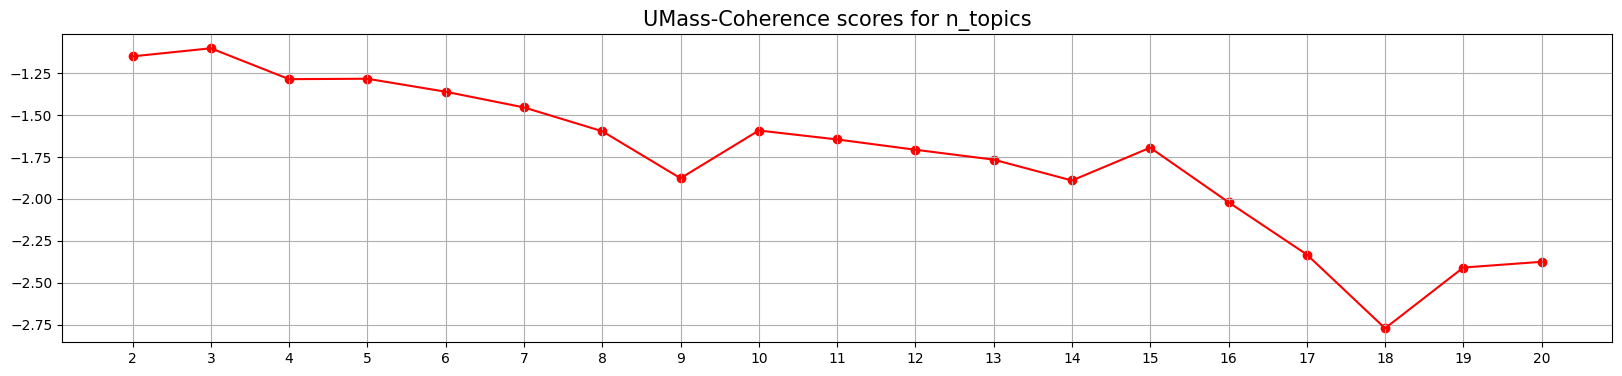

In [ ]:
# UMass-Coherence values visualization
nums_topics = list(range(2, MAX_K+1))

plt.figure(figsize=(20,4))
plt.title(f'UMass-Coherence scores for n_topics', fontsize=15)

plt.plot(
    nums_topics,
    coherences_umass,
    color='red'
)
plt.scatter(
    nums_topics,
    coherences_umass,
    color='red'
)

plt.xticks(nums_topics)
plt.grid(True)
plt.show()

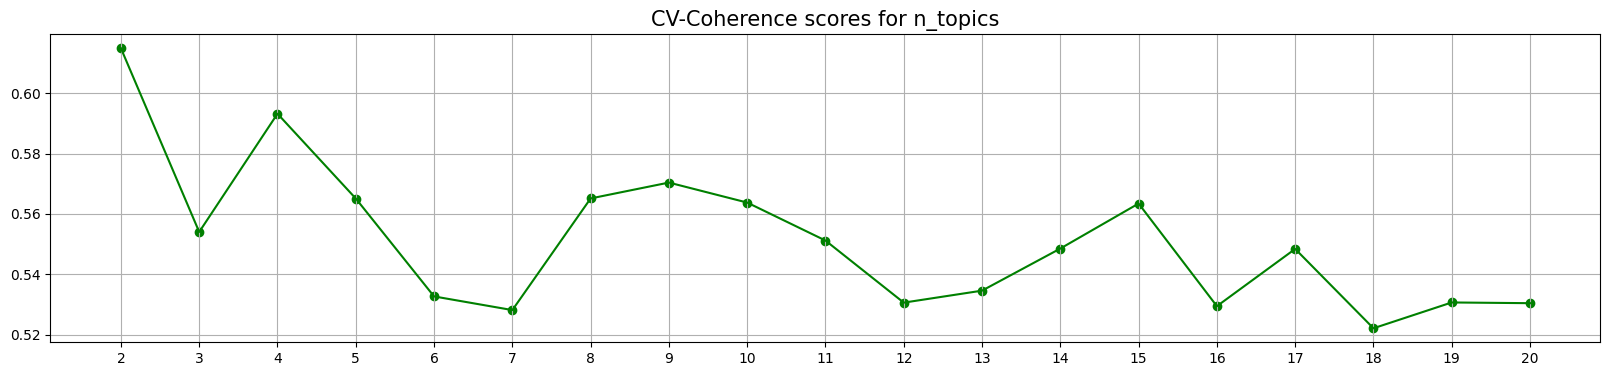

In [ ]:
# CV-Coherence values visualization
nums_topics = list(range(2, MAX_K+1))

plt.figure(figsize=(20,4))
plt.title(f'CV-Coherence scores for n_topics', fontsize=15)

plt.plot(
    nums_topics,
    coherences_cv,
    color='green'
)
plt.scatter(
    nums_topics,
    coherences_cv,
    color='green'
)

plt.xticks(nums_topics)
plt.grid(True)
plt.show()

The optimal number of topics: K=2

## Topic model of the whole corpus:

In [ ]:
# now train the model with an optimal k

NUM_PASSES = 20
NUM_ITERATIONS = 400
K = 2

final_lda_model = LdaModel(
        corpus=pd_news_corpus,
        id2word=pd_news_dict,
        num_topics=K,
        passes = NUM_PASSES,
        iterations = NUM_ITERATIONS
    )

In [ ]:
for idx in range(K):
    print(f"Topic #{idx}: ", final_lda_model.print_topic(idx, 10))

Topic #0:  0.018*"всу" + 0.014*"область" + 0.014*"военный" + 0.010*"российский" + 0.010*"украинский" + 0.009*"сила" + 0.008*"апрель" + 0.008*"удар" + 0.006*"уничтожать" + 0.006*"также"
Topic #1:  0.011*"украина" + 0.010*"сша" + 0.009*"президент" + 0.008*"год" + 0.007*"заявлять" + 0.007*"трамп" + 0.007*"страна" + 0.006*"свой" + 0.005*"также" + 0.005*"российский"


In [ ]:
# visualizing the relations between topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(final_lda_model, pd_news_corpus, pd_news_dict)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.162234  0.0       1        1  70.011624
0     -0.162234  0.0       2        1  29.988376, topic_info=             Term         Freq        Total Category  logprob  loglift
21            всу  2345.000000  2345.000000  Default  30.0000  30.0000
149       область  1796.000000  1796.000000  Default  29.0000  29.0000
15        военный  2441.000000  2441.000000  Default  28.0000  28.0000
94           сила  1314.000000  1314.000000  Default  27.0000  27.0000
102          удар  1046.000000  1046.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
208         также   789.917959  2423.435490   Topic2  -5.0847   0.0833
85   рассказывать   508.067648   851.720999   Topic2  -5.5260   0.6877
104       украина   762.812818  4132.199301   Topic2  -5.1196  -0.4852
217       человек   521.357028  1085.159328   Topic2  -5.5002   0.4713
209    территория   518.842420  1093.592384   Topic2  -5.5050   0.4587

[149 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
356       1  0.939045  американский
356       2  0.060965  американский
0         1  0.022081       аппарат
0         2  0.979847       аппарат
1         1  0.531555        апрель
...     ...       ...           ...
2672      2  0.002336      франциск
217       1  0.519739       человек
217       2  0.480114       человек
763       1  0.998158          штат
763       2  0.001760          штат

[229 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

# Counting inter-corpus disbalances

In [ ]:
list_of_topic_probas = list(final_lda_model.get_document_topics(pd_news_corpus, minimum_probability=0))
print(len(list_of_topic_probas))
print(list_of_topic_probas[0]) # format: [doc1[(topic1, topic1_proba), (topic2, topic2_proba)...]...]

3554
[(0, 0.9944618), (1, 0.005538241)]


In [ ]:
topic_probas = np.array(list(
    map(lambda x: [item[1] for item in x], list_of_topic_probas))
        )

topic_probas_df = pd.DataFrame(
    topic_probas,
    columns=['topic_0', 'topic_1']
)
topic_probas_df[['preprocessed_text', 'source']] = preproc_pd_news_ds[['preprocessed_text', 'source']]
topic_probas_df.head(20)

,topic_0,topic_1,preprocessed_text,source
0,0.994462,0.005538,минобороны рассказывать подвиг российский воен...,Известия
1,0.916337,0.083664,освобождать всу последний населенный пункт кур...,Известия
2,0.987660,0.012340,всу тыс нарушать режим пасхальный перемирие во...,Известия
3,0.995302,0.004698,купол донбасс сорвать 269 атака украинский бпл...,Известия
4,0.474686,0.525314,истекать срок действие объявлять россия пасхал...,Известия
5,0.997264,0.002736,карта спецоперация украина апрель специальный ...,Известия
6,0.919711,0.080289,всу потерять 155 боевик курский приграничье об...,Известия
7,0.912768,0.087232,освобождать новомихайловка днр объявление пере...,Известия
8,0.917129,0.082871,всу пытаться атаковать населенный пункт днр на...,Известия
9,0.852672,0.147328,боец группировка войско восток встречать пасха...,Известия


In [ ]:
def intercorpus_disbalance(topic_probas_df, subcorpus, topic):

    numerator = topic_probas_df[
                topic_probas_df['source'] == subcorpus
                ][topic].sum()

    return numerator / topic_probas_df.shape[0]

In [ ]:
subcorpora = ['Известия', 'Российская газета', 'Московский комсомолец']
topics = ['topic_0', 'topic_1']

disbalances_dict = {
    'Известия': {},
    'Российская газета': {},
    'Московский комсомолец': {}
}

for subcorpus in subcorpora:
    for topic in topics:

        disbalance = intercorpus_disbalance(topic_probas_df, subcorpus, topic)
        disbalances_dict[subcorpus][topic] = disbalance

In [ ]:
disbalances_dict

{'Известия': {'topic_0': 0.14354757760841658, 'topic_1': 0.21632860105361038},
 'Российская газета': {'topic_0': 0.08976468251002391,
  'topic_1': 0.21383689317934018},
 'Московский комсомолец': {'topic_0': 0.09108033875233013,
  'topic_1': 0.24544188972262768}}

In [ ]:
sum(disbalances_dict['Известия'].values()) + \
sum(disbalances_dict['Российская газета'].values()) + \
sum(disbalances_dict['Московский комсомолец'].values())

0.9999999828263488

In [ ]:
topic_probas_df[topics][:10]

,topic_0,topic_1
0,0.994462,0.005538
1,0.916337,0.083664
2,0.987660,0.012340
3,0.995302,0.004698
4,0.474686,0.525314
5,0.997264,0.002736
6,0.919711,0.080289
7,0.912768,0.087232
8,0.917129,0.082871
9,0.852672,0.147328


# Classifying texts into propagandistic/non-propagandistic

In [ ]:
def count_propaganda_proba(row):
    weights = list(disbalances_dict[row['source']].values())
    return np.average(row[topics], weights=weights)

In [ ]:
propaganda_estimates = topic_probas_df.apply(count_propaganda_proba, axis=1)

In [ ]:
propaganda_estimates[:20]

0     0.400001
1     0.415801
2     0.401376
3     0.399831
4     0.505119
5     0.399434
6     0.415118
7     0.416522
8     0.415640
9     0.428676
10    0.442822
11    0.402239
12    0.427937
13    0.474477
14    0.463535
15    0.438502
16    0.460489
17    0.485267
18    0.523798
19    0.426387
dtype: float64

In [ ]:
# printing the number of propagandistic texts
propaganda_estimates[propaganda_estimates >= 0.5].shape

(2487,)

In [ ]:
# testing tresholds, used in the paper
print(propaganda_estimates[propaganda_estimates >= 0.6].shape)
print(propaganda_estimates[propaganda_estimates >= 0.7].shape)

(1695,)
(869,)


In [ ]:
preproc_pd_news_ds['propagandistic'] = propaganda_estimates.round()
preproc_pd_news_ds.head(10)

,link,headline,text,source,preprocessed_text,propagandistic
0,Izvestiya_articles_armiia\1.txt,Минобороны РФ рассказало о подвигах российских...,Минобороны РФ рассказало о подвигах российских...,Известия,минобороны рассказывать подвиг российский воен...,0.0
1,Izvestiya_articles_armiia\10.txt,Освобожден от ВСУ последний населенный пункт в...,Освобожден от ВСУ последний населенный пункт в...,Известия,освобождать всу последний населенный пункт кур...,0.0
2,Izvestiya_articles_armiia\100.txt,"ВСУ 4,9 тыс. раз нарушили режим пасхального пе...","ВСУ 4,9 тыс. раз нарушили режим пасхального пе...",Известия,всу тыс нарушать режим пасхальный перемирие во...,0.0
3,Izvestiya_articles_armiia\101.txt,«Купол Донбасса» сорвал 269 атак украинских БП...,«Купол Донбасса» сорвал 269 атак украинских БП...,Известия,купол донбасс сорвать 269 атака украинский бпл...,0.0
4,Izvestiya_articles_armiia\102.txt,Истек срок действия объявленного Россией пасха...,Истек срок действия объявленного Россией пасха...,Известия,истекать срок действие объявлять россия пасхал...,1.0
5,Izvestiya_articles_armiia\103.txt,Карта спецоперации на Украине 20 апреля,Карта спецоперации на Украине 20 апреля\nСпеци...,Известия,карта спецоперация украина апрель специальный ...,0.0
6,Izvestiya_articles_armiia\104.txt,ВСУ потеряли до 155 боевиков в курском пригран...,ВСУ потеряли до 155 боевиков в курском пригран...,Известия,всу потерять 155 боевик курский приграничье об...,0.0
7,Izvestiya_articles_armiia\105.txt,ВС РФ освободили Новомихайловку в ДНР до объяв...,ВС РФ освободили Новомихайловку в ДНР до объяв...,Известия,освобождать новомихайловка днр объявление пере...,0.0
8,Izvestiya_articles_armiia\106.txt,ВСУ пытались атаковать населенные пункты в ДНР...,ВСУ пытались атаковать населенные пункты в ДНР...,Известия,всу пытаться атаковать населенный пункт днр на...,0.0
9,Izvestiya_articles_armiia\107.txt,Бойцы группировки войск «Восток» встретили Пас...,Бойцы группировки войск «Восток» встретили Пас...,Известия,боец группировка войско восток встречать пасха...,0.0


# Additional topic modeling for subtopics exploration

The number of 2 topics is rather insufficient to describe the variety of themes, discussed in modern Russian news, and find their relations with propaganda. So now let's build an additional topic model, based on the best K>=5 according to CV-metric. In our case it's K=9.

In [ ]:
NUM_PASSES = 20
NUM_ITERATIONS = 400
K = 9

final_lda_model = LdaModel(
        corpus=pd_news_corpus,
        id2word=pd_news_dict,
        num_topics=K,
        passes = NUM_PASSES,
        iterations = NUM_ITERATIONS
    )

In [ ]:
for idx in range(K):
    print(f"Topic #{idx}: ", final_lda_model.print_topic(idx, 10))

Topic #0:  0.029*"папа" + 0.023*"франциск" + 0.020*"римский" + 0.015*"год" + 0.014*"монастырь" + 0.012*"святой" + 0.011*"понтифик" + 0.011*"церковь" + 0.009*"область" + 0.009*"становиться"
Topic #1:  0.031*"путин" + 0.029*"президент" + 0.014*"владимир" + 0.014*"российский" + 0.012*"встреча" + 0.012*"глава" + 0.012*"москва" + 0.010*"песок" + 0.010*"переговоры" + 0.010*"заявлять"
Topic #2:  0.030*"всу" + 0.020*"военный" + 0.018*"пункт" + 0.016*"сила" + 0.015*"войско" + 0.014*"российский" + 0.013*"уничтожать" + 0.013*"группировка" + 0.013*"область" + 0.011*"апрель"
Topic #3:  0.019*"год" + 0.007*"новый" + 0.006*"работа" + 0.005*"также" + 0.005*"гражданин" + 0.005*"весь" + 0.005*"человек" + 0.004*"суд" + 0.004*"регион" + 0.004*"проект"
Topic #4:  0.017*"военный" + 0.015*"российский" + 0.014*"перемирие" + 0.011*"всу" + 0.010*"боец" + 0.009*"пасхальный" + 0.008*"весь" + 0.008*"свой" + 0.008*"рассказывать" + 0.008*"боевой"
Topic #5:  0.016*"страна" + 0.009*"заявлять" + 0.008*"свой" + 0.006*"с

In [ ]:
# visualizing the relations between topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(final_lda_model, pd_news_corpus, pd_news_dict)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.134904 -0.122952       1        1  22.166852
3      0.086555  0.020576       2        1  17.313737
5      0.155262 -0.062335       3        1  16.448164
2     -0.290263 -0.055623       4        1  10.577294
1      0.190974 -0.087430       5        1   9.585527
4     -0.035993 -0.007981       6        1   8.851301
6     -0.065302  0.065520       7        1   6.016544
7     -0.241032 -0.041803       8        1   5.080578
0      0.064895  0.292026       9        1   3.960003, topic_info=           Term         Freq        Total Category  logprob  loglift
758         сша  3315.000000  3315.000000  Default  30.0000  30.0000
669       трамп  2181.000000  2181.000000  Default  29.0000  29.0000
21          всу  2436.000000  2436.000000  Default  28.0000  28.0000
182   президент  2826.000000  2826.000000  Default  27.0000  27.0000
149     область  1810.000000  1810.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
129       глава    98.157928  1660.309029   Topic9  -5.1455   0.4007
209  территория    89.007591  1086.056447   Topic9  -5.2434   0.7273
233       время    81.696110  1248.700742   Topic9  -5.3291   0.5021
208       также    87.352656  2444.786407   Topic9  -5.2621  -0.1028
735         мир    71.118352   634.097755   Topic9  -5.4677   1.0411

[691 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
332       6  0.963898     0000
333       6  0.985412     1800
1297      2  0.718297     2025
1297      3  0.126493     2025
1297      5  0.058729     2025
...     ...       ...      ...
1761      3  0.024020  ядерный
1761      5  0.821489  ядерный
641       9  0.975982     яйцо
3827      2  0.018568   япония
3827      3  0.965549   япония

[1685 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 4, 6, 3, 2, 5, 7, 8, 1])

In [ ]:
list_of_topic_probas = list(final_lda_model.get_document_topics(pd_news_corpus, minimum_probability=0))
print(len(list_of_topic_probas))
print(list_of_topic_probas[0]) # format: [doc1[(topic1, topic1_proba), (topic2, topic2_proba)...]...]

3554
[(0, 0.00070371677), (1, 0.0007037913), (2, 0.7534703), (3, 0.0007039159), (4, 0.24160305), (5, 0.0007037663), (6, 0.0007036836), (7, 0.00070397597), (8, 0.00070382457)]


In [ ]:
topic_probas = np.array(list(
    map(lambda x: [item[1] for item in x], list_of_topic_probas))
        )

In [ ]:
# getting topic ids for each text
topic_ids = topic_probas.argmax(axis=1)
topic_ids[:20]

array([2, 2, 2, 7, 4, 2, 2, 2, 7, 4, 4, 4, 2, 4, 4, 4, 4, 4, 7, 2])

In [ ]:
preproc_pd_news_ds['topic_id'] = topic_ids
preproc_pd_news_ds.head(20)

,link,headline,text,source,preprocessed_text,propagandistic,topic_id
0,Izvestiya_articles_armiia\1.txt,Минобороны РФ рассказало о подвигах российских...,Минобороны РФ рассказало о подвигах российских...,Известия,минобороны рассказывать подвиг российский воен...,0.0,2
1,Izvestiya_articles_armiia\10.txt,Освобожден от ВСУ последний населенный пункт в...,Освобожден от ВСУ последний населенный пункт в...,Известия,освобождать всу последний населенный пункт кур...,0.0,2
2,Izvestiya_articles_armiia\100.txt,"ВСУ 4,9 тыс. раз нарушили режим пасхального пе...","ВСУ 4,9 тыс. раз нарушили режим пасхального пе...",Известия,всу тыс нарушать режим пасхальный перемирие во...,0.0,2
3,Izvestiya_articles_armiia\101.txt,«Купол Донбасса» сорвал 269 атак украинских БП...,«Купол Донбасса» сорвал 269 атак украинских БП...,Известия,купол донбасс сорвать 269 атака украинский бпл...,0.0,7
4,Izvestiya_articles_armiia\102.txt,Истек срок действия объявленного Россией пасха...,Истек срок действия объявленного Россией пасха...,Известия,истекать срок действие объявлять россия пасхал...,1.0,4
5,Izvestiya_articles_armiia\103.txt,Карта спецоперации на Украине 20 апреля,Карта спецоперации на Украине 20 апреля\nСпеци...,Известия,карта спецоперация украина апрель специальный ...,0.0,2
6,Izvestiya_articles_armiia\104.txt,ВСУ потеряли до 155 боевиков в курском пригран...,ВСУ потеряли до 155 боевиков в курском пригран...,Известия,всу потерять 155 боевик курский приграничье об...,0.0,2
7,Izvestiya_articles_armiia\105.txt,ВС РФ освободили Новомихайловку в ДНР до объяв...,ВС РФ освободили Новомихайловку в ДНР до объяв...,Известия,освобождать новомихайловка днр объявление пере...,0.0,2
8,Izvestiya_articles_armiia\106.txt,ВСУ пытались атаковать населенные пункты в ДНР...,ВСУ пытались атаковать населенные пункты в ДНР...,Известия,всу пытаться атаковать населенный пункт днр на...,0.0,7
9,Izvestiya_articles_armiia\107.txt,Бойцы группировки войск «Восток» встретили Пас...,Бойцы группировки войск «Восток» встретили Пас...,Известия,боец группировка войско восток встречать пасха...,0.0,4


In [ ]:
preproc_pd_news_ds.to_excel('/kaggle/working/preprocessed_news_dataset_with_topics.xlsx')